In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (./) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e9/test.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/daily-internet-usage-statistics-by-age-group/daily_internet_usage_by_age_group.csv
/kaggle/input/barista-bench/menu.md
/kaggle/input/barista-bench/test.csv
/kaggle/input/barista-bench/train.csv
/kaggle/input/barista-bench/sample_submission.csv
/kaggle/input/playground-series-s6e2/test.csv
/kaggle/input/playground-series-s6e2/train.csv
/kaggle/input/playground-series-s6e2/sample_submission.csv
/kaggle/input/ecommerce-dataset-for-data-analysis/store_dim.csv
/kaggle/input/ecommerce-dataset-for-data-analysis/Trans_dim.csv
/kaggle/input/ecommerce-dataset-for-data-analysis/item_dim.csv
/kaggle/input/ecommerce-dataset-for-data-analysis/customer_dim.csv
/kaggle/input/ecommerce-dataset-for-data-analysis/fact_table.csv
/kaggle/input/ecommerce-dataset-for-data-analysis/time_dim.csv
/kaggle/input/worlds-biggest-data-breaches-and-hacks

---
# TLDR Social Media Addiction Analysis
This analysis takes a two-phase approach to understanding social media addiction among students.

**Phase 1:** 
Exploratory Analysis — We start with standard EDA to understand the data structure, distributions, and relationships. The correlations here are strong — almost too strong. Usage predicts addiction, addiction predicts poor mental health, and sleep suffers across the board. The story writes itself, and it's the same story every study tells: more screen time, worse outcomes.

**Phase 2:** 
The Interesting Question — But that obvious narrative isn't actionable. "Use less social media" isn't advice anyone follows. So we flip the question: instead of asking what causes harm, we ask what protects against it. Our hypothesis is that within this data, there's a subset of students who are high-usage but not high-addiction, or high-addiction but still maintaining decent mental health. These edge cases — the students who break the expected pattern — are where the actionable insights live. If we can identify what distinguishes them, we get intervention targets that go beyond "just log off."

---

In [2]:
df = pd.read_csv("/kaggle/input/student-social-media-addiction-analysis-dataset/Students Social Media Addiction.csv")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

df = pd.read_csv('/kaggle/input/student-social-media-addiction-analysis-dataset/Students Social Media Addiction.csv')
print(f'Dataset: {df.shape[0]} rows, {df.shape[1]} columns')
df.head()

Dataset: 705 rows, 13 columns


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


# 1. Data Overview

In [4]:
print('Column Types:')
print(df.dtypes)
print('\n' + '='*50)
print('\nMissing Values:')
print(df.isnull().sum())

Column Types:
Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object


Missing Values:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score            

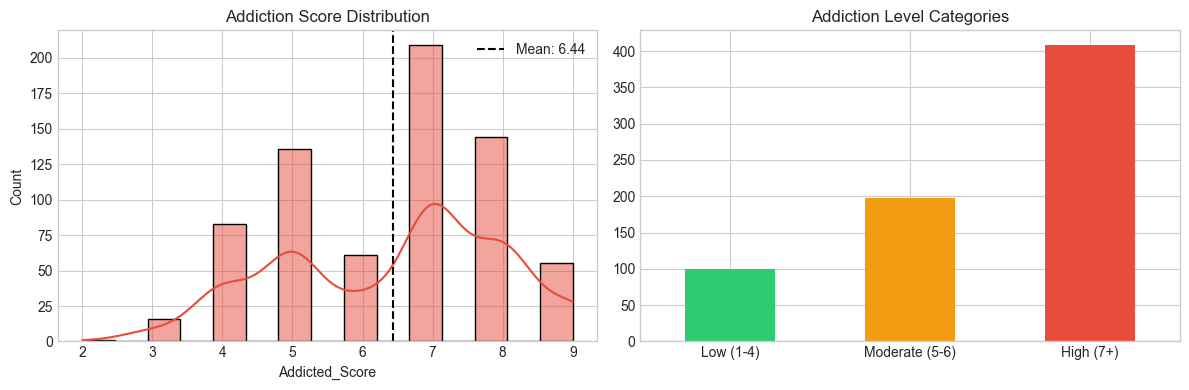

Addiction_Level
Low (1-4)         100
Moderate (5-6)    197
High (7+)         408
Name: count, dtype: int64


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution
sns.histplot(df['Addicted_Score'], bins=15, kde=True, ax=axes[0], color='#e74c3c')
axes[0].axvline(df['Addicted_Score'].mean(), color='black', linestyle='--', 
                label=f"Mean: {df['Addicted_Score'].mean():.2f}")
axes[0].set_title('Addiction Score Distribution')
axes[0].legend()

# Categorized
df['Addiction_Level'] = pd.cut(df['Addicted_Score'], 
                               bins=[0, 4, 6, 10], 
                               labels=['Low (1-4)', 'Moderate (5-6)', 'High (7+)'])
df['Addiction_Level'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[1].set_title('Addiction Level Categories')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print(df['Addiction_Level'].value_counts().sort_index())

---
 ## Categorical Distribution

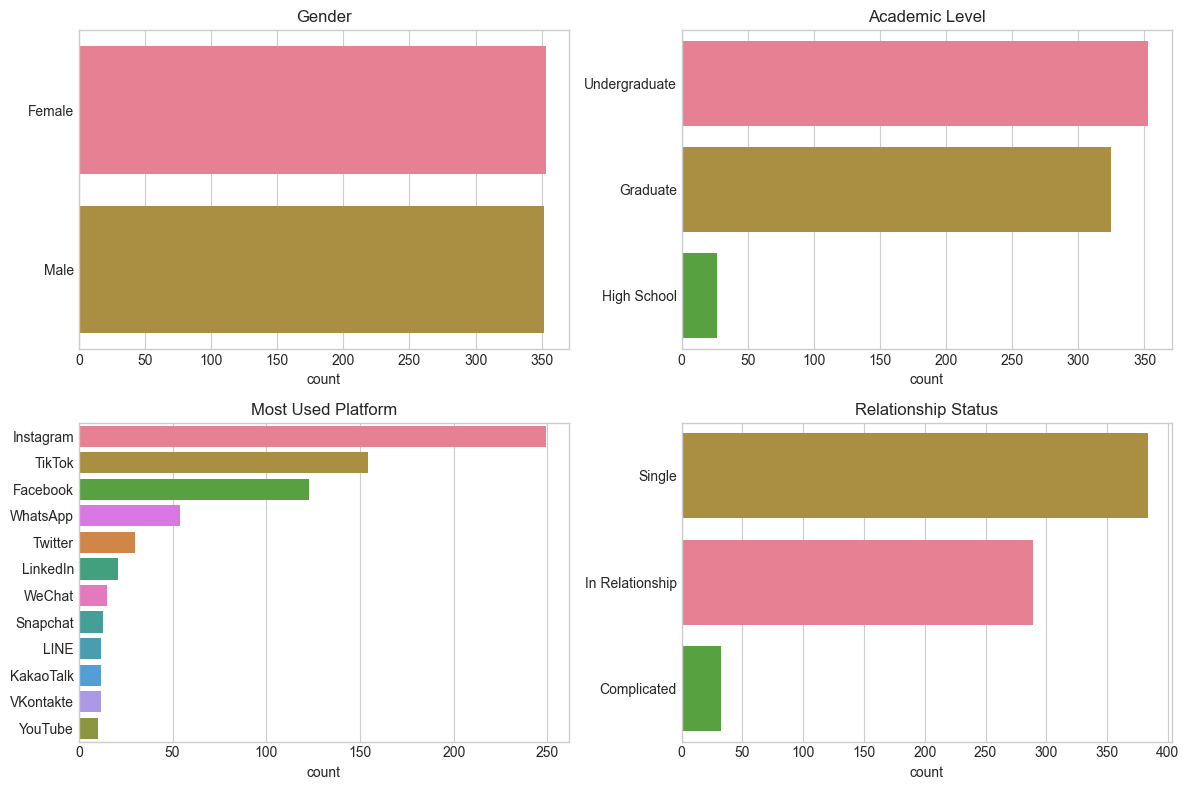

In [6]:
cat_cols = ['Gender', 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    order = df[col].value_counts().index
    sns.countplot(data=df, y=col, order=order, ax=axes[i], hue=col, legend=False)
    axes[i].set_title(col.replace('_', ' '))
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

---
## Correlation

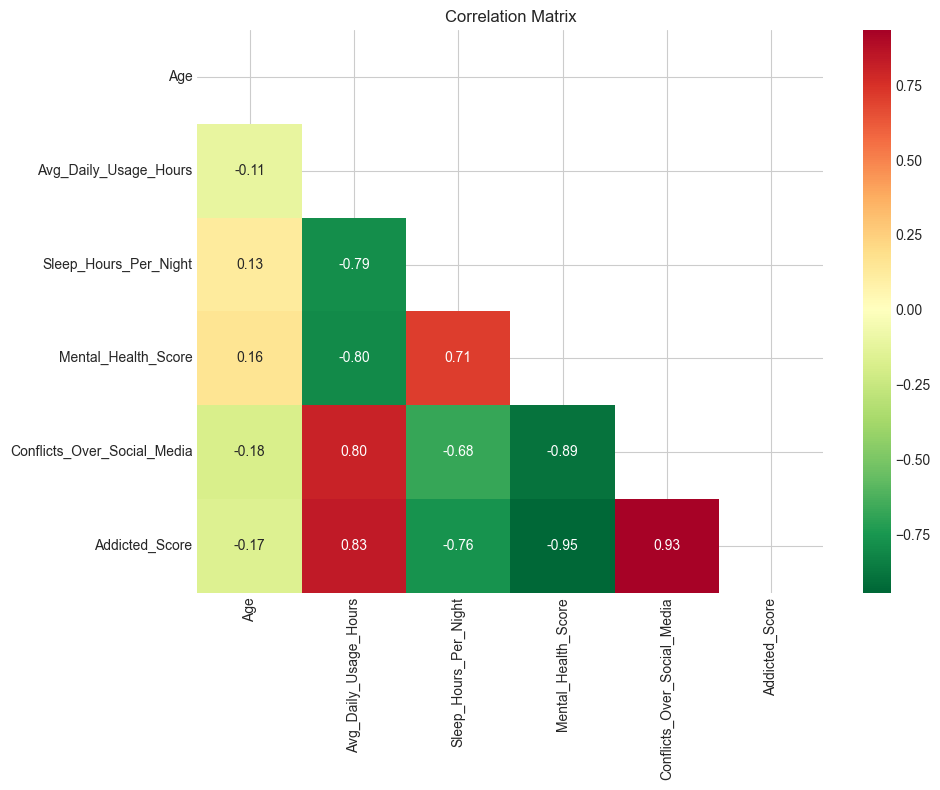


Correlations with Addicted_Score:
Mental_Health_Score           -0.945
Sleep_Hours_Per_Night         -0.765
Age                           -0.166
Avg_Daily_Usage_Hours          0.832
Conflicts_Over_Social_Media    0.934
Name: Addicted_Score, dtype: float64


In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove ID if present
numeric_cols = [c for c in numeric_cols if 'ID' not in c.upper()]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn_r', center=0, fmt='.2f', mask=mask)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print('\nCorrelations with Addicted_Score:')
print(corr_matrix['Addicted_Score'].drop('Addicted_Score').sort_values().round(3))

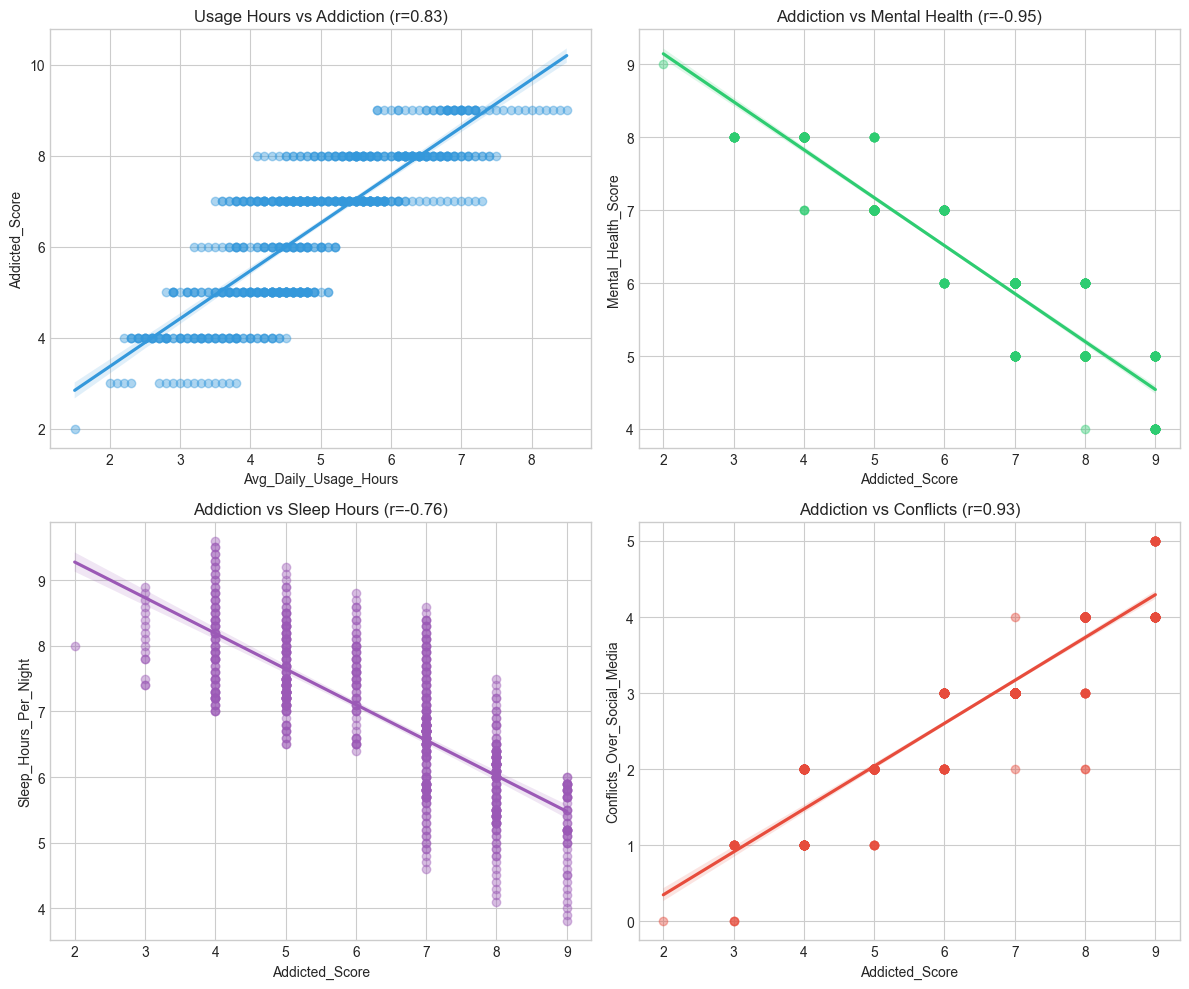

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Usage vs Addiction
sns.regplot(data=df, x='Avg_Daily_Usage_Hours', y='Addicted_Score', 
            scatter_kws={'alpha':0.4}, ax=axes[0,0], color='#3498db')
r = df['Avg_Daily_Usage_Hours'].corr(df['Addicted_Score'])
axes[0,0].set_title(f'Usage Hours vs Addiction (r={r:.2f})')

# Mental Health vs Addiction
sns.regplot(data=df, x='Addicted_Score', y='Mental_Health_Score', 
            scatter_kws={'alpha':0.4}, ax=axes[0,1], color='#2ecc71')
r = df['Addicted_Score'].corr(df['Mental_Health_Score'])
axes[0,1].set_title(f'Addiction vs Mental Health (r={r:.2f})')

# Sleep vs Addiction
sns.regplot(data=df, x='Addicted_Score', y='Sleep_Hours_Per_Night', 
            scatter_kws={'alpha':0.4}, ax=axes[1,0], color='#9b59b6')
r = df['Addicted_Score'].corr(df['Sleep_Hours_Per_Night'])
axes[1,0].set_title(f'Addiction vs Sleep Hours (r={r:.2f})')

# Conflicts vs Addiction
sns.regplot(data=df, x='Addicted_Score', y='Conflicts_Over_Social_Media', 
            scatter_kws={'alpha':0.4}, ax=axes[1,1], color='#e74c3c')
r = df['Addicted_Score'].corr(df['Conflicts_Over_Social_Media'])
axes[1,1].set_title(f'Addiction vs Conflicts (r={r:.2f})')

plt.tight_layout()
plt.show()

---
## Group Comparison

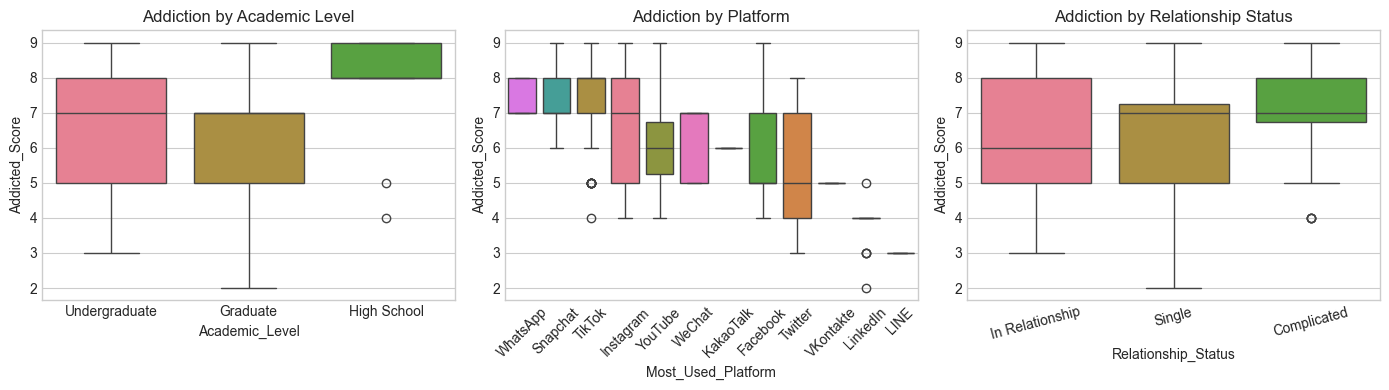

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# By Academic Level
sns.boxplot(data=df, x='Academic_Level', y='Addicted_Score', ax=axes[0], hue='Academic_Level', legend=False)
axes[0].set_title('Addiction by Academic Level')

# By Platform
platform_order = df.groupby('Most_Used_Platform')['Addicted_Score'].mean().sort_values(ascending=False).index
sns.boxplot(data=df, x='Most_Used_Platform', y='Addicted_Score', order=platform_order, ax=axes[1], hue='Most_Used_Platform', legend=False)
axes[1].set_title('Addiction by Platform')
axes[1].tick_params(axis='x', rotation=45)

# By Relationship Status
sns.boxplot(data=df, x='Relationship_Status', y='Addicted_Score', ax=axes[2], hue='Relationship_Status', legend=False)
axes[2].set_title('Addiction by Relationship Status')
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

In [10]:
print('Mean Addiction Score by Platform:')
print(df.groupby('Most_Used_Platform')['Addicted_Score'].agg(['mean', 'std', 'count']).round(2).sort_values('mean', ascending=False))

Mean Addiction Score by Platform:
                    mean   std  count
Most_Used_Platform                   
Snapchat            7.46  0.78     13
WhatsApp            7.46  0.50     54
TikTok              7.43  1.04    154
Instagram           6.55  1.54    249
YouTube             6.10  1.37     10
WeChat              6.07  1.03     15
KakaoTalk           6.00  0.00     12
Facebook            5.67  1.44    123
Twitter             5.50  1.55     30
VKontakte           5.00  0.00     12
LinkedIn            3.81  0.60     21
LINE                3.00  0.00     12


---
## High Risk Profile

In [11]:
threshold = df['Addicted_Score'].quantile(0.75)
high_addiction = df[df['Addicted_Score'] >= threshold]
low_addiction = df[df['Addicted_Score'] <= df['Addicted_Score'].quantile(0.25)]

print(f'High Addiction Group (score >= {threshold:.0f}): {len(high_addiction)} students ({len(high_addiction)/len(df)*100:.1f}%)')
print(f'Low Addiction Group (score <= {df["Addicted_Score"].quantile(0.25):.0f}): {len(low_addiction)} students\n')

comparison = pd.DataFrame({
    'High Addiction': [
        high_addiction['Avg_Daily_Usage_Hours'].mean(),
        high_addiction['Sleep_Hours_Per_Night'].mean(),
        high_addiction['Mental_Health_Score'].mean(),
        high_addiction['Conflicts_Over_Social_Media'].mean()
    ],
    'Low Addiction': [
        low_addiction['Avg_Daily_Usage_Hours'].mean(),
        low_addiction['Sleep_Hours_Per_Night'].mean(),
        low_addiction['Mental_Health_Score'].mean(),
        low_addiction['Conflicts_Over_Social_Media'].mean()
    ]
}, index=['Avg Daily Usage (hrs)', 'Sleep (hrs)', 'Mental Health Score', 'Conflicts'])

comparison['Difference'] = comparison['High Addiction'] - comparison['Low Addiction']
print(comparison.round(2))

High Addiction Group (score >= 8): 199 students (28.2%)
Low Addiction Group (score <= 5): 236 students

                       High Addiction  Low Addiction  Difference
Avg Daily Usage (hrs)            6.26           3.76        2.49
Sleep (hrs)                      5.73           7.84       -2.11
Mental Health Score              4.97           7.45       -2.48
Conflicts                        4.01           1.77        2.24


# 2. Student Social Media Addiction: Predictive Analysis
**Beyond the Obvious: Why I'm Looking at Resilience Instead**
The correlations here are almost *too* clean. An r = -0.95 between addiction and mental health is suspiciously high — that's either data leakage, a composite score built from overlapping survey questions, or a very constrained study design. Either way, the "more usage → more addiction → worse mental health" story writes itself and doesn't give us much to work with.

So I'm flipping the question.

Instead of asking "what predicts addiction?" (answer: usage, obviously), I want to know **what protects certain students from the negative effects despite high usage?**

There's a subset of students in this data who are high-usage but *not* high-addiction, or high-addiction but still maintaining decent mental health. These outliers are the interesting cases — the ones who break the pattern.

**My approach:**
1. Define a "resilience" flag for students in the top quartile of usage but bottom half of addiction, OR high addiction but above-median mental health
2. Profile them against vulnerable students — what's different about their demographics, platform choice, relationship status, sleep?
3. Train a classifier to surface which features actually distinguish resilient vs. vulnerable students

**Why this matters:** "Use less social media" is obvious advice and largely ineffective. If we can identify *why* some students handle high usage without spiraling, we get actionable intervention targets — sleep hygiene, platform switching, relationship support — things that can actually be addressed.

---
## Defining Resilience

We create a binary flag identifying students who "beat the odds" — either using social media heavily without becoming addicted, or maintaining mental health despite high addiction scores.

In [12]:
# Define resilience groups
usage_median = df['Avg_Daily_Usage_Hours'].median()
addiction_median = df['Addicted_Score'].median()
mh_median = df['Mental_Health_Score'].median()

# Resilient: High usage but low addiction
df['Resilient_Usage'] = (df['Avg_Daily_Usage_Hours'] >= df['Avg_Daily_Usage_Hours'].quantile(0.75)) & \
                        (df['Addicted_Score'] <= addiction_median)

# Resilient: High addiction but maintaining mental health
df['Resilient_MH'] = (df['Addicted_Score'] >= df['Addicted_Score'].quantile(0.75)) & \
                     (df['Mental_Health_Score'] >= mh_median)

# Combined resilience flag
df['Resilient'] = df['Resilient_Usage'] | df['Resilient_MH']

print(f"Resilient (high usage, low addiction): {df['Resilient_Usage'].sum()} students")
print(f"Resilient (high addiction, ok mental health): {df['Resilient_MH'].sum()} students")
print(f"Total resilient: {df['Resilient'].sum()} students ({df['Resilient'].mean()*100:.1f}%)")

Resilient (high usage, low addiction): 40 students
Resilient (high addiction, ok mental health): 24 students
Total resilient: 64 students (9.1%)


## Resilient vs. Vulnerable Profile

Comparing the two groups head-to-head on key metrics. What's different about students who maintain wellbeing despite high exposure?

In [13]:
# Profile comparison: Resilient vs Vulnerable
resilient = df[df['Resilient'] == True]
vulnerable = df[(df['Avg_Daily_Usage_Hours'] >= df['Avg_Daily_Usage_Hours'].quantile(0.75)) & 
                (df['Addicted_Score'] > addiction_median) & 
                (df['Mental_Health_Score'] < mh_median)]

print(f"Comparing {len(resilient)} resilient vs {len(vulnerable)} vulnerable high-usage students\n")

compare_cols = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 
                'Conflicts_Over_Social_Media', 'Addicted_Score', 'Age']

comparison = pd.DataFrame({
    'Resilient': resilient[compare_cols].mean(),
    'Vulnerable': vulnerable[compare_cols].mean() if len(vulnerable) > 0 else np.nan
}).round(2)
comparison['Delta'] = (comparison['Resilient'] - comparison['Vulnerable']).round(2)
print(comparison)

Comparing 64 resilient vs 133 vulnerable high-usage students

                             Resilient  Vulnerable  Delta
Avg_Daily_Usage_Hours             5.90        6.73  -0.83
Sleep_Hours_Per_Night             5.80        5.69   0.11
Mental_Health_Score               5.98        4.78   1.20
Conflicts_Over_Social_Media       3.31        4.11  -0.80
Addicted_Score                    7.38        8.41  -1.03
Age                              20.84       20.47   0.37


In [14]:
# Categorical profiles
print("\n=== Platform Distribution ===")
print("\nResilient:")
print(resilient['Most_Used_Platform'].value_counts(normalize=True).head().round(3))
print("\nVulnerable:")
if len(vulnerable) > 0:
    print(vulnerable['Most_Used_Platform'].value_counts(normalize=True).head().round(3))

print("\n=== Relationship Status ===")
print("\nResilient:")
print(resilient['Relationship_Status'].value_counts(normalize=True).round(3))
print("\nVulnerable:")
if len(vulnerable) > 0:
    print(vulnerable['Relationship_Status'].value_counts(normalize=True).round(3))


=== Platform Distribution ===

Resilient:
Most_Used_Platform
TikTok       0.406
WhatsApp     0.359
Instagram    0.172
Snapchat     0.016
Facebook     0.016
Name: proportion, dtype: float64

Vulnerable:
Most_Used_Platform
Instagram    0.368
TikTok       0.256
WhatsApp     0.188
Facebook     0.143
Twitter      0.030
Name: proportion, dtype: float64

=== Relationship Status ===

Resilient:
Relationship_Status
Single             0.719
In Relationship    0.281
Name: proportion, dtype: float64

Vulnerable:
Relationship_Status
Single             0.504
In Relationship    0.436
Complicated        0.060
Name: proportion, dtype: float64


### Visualizing the Resilience Quadrants

Plotting students in "quadrant" space to see where resilient students (green) cluster compared to the overall population. The red dashed lines mark our thresholds.

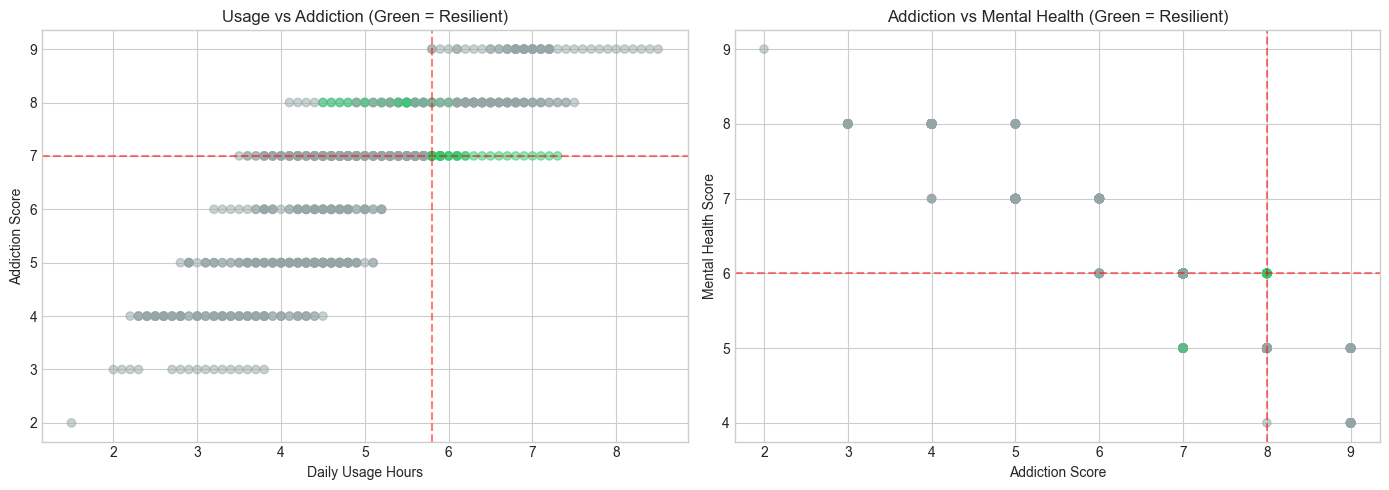

In [15]:
# Visualize the resilience quadrants
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = df['Resilient'].map({True: '#2ecc71', False: '#95a5a6'})
axes[0].scatter(df['Avg_Daily_Usage_Hours'], df['Addicted_Score'], c=colors, alpha=0.5)
axes[0].axvline(df['Avg_Daily_Usage_Hours'].quantile(0.75), color='red', linestyle='--', alpha=0.5)
axes[0].axhline(addiction_median, color='red', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Daily Usage Hours')
axes[0].set_ylabel('Addiction Score')
axes[0].set_title('Usage vs Addiction (Green = Resilient)')

axes[1].scatter(df['Addicted_Score'], df['Mental_Health_Score'], c=colors, alpha=0.5)
axes[1].axvline(df['Addicted_Score'].quantile(0.75), color='red', linestyle='--', alpha=0.5)
axes[1].axhline(mh_median, color='red', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Addiction Score')
axes[1].set_ylabel('Mental Health Score')
axes[1].set_title('Addiction vs Mental Health (Green = Resilient)')

plt.tight_layout()
plt.show()

### Classifier: What Predicts Resilience?

Training a Random Forest to predict resilience from demographics, platform choice, relationship status, and sleep — deliberately excluding usage and addiction scores to avoid leakage. Feature importance tells us which factors actually differentiate resilient students.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score

# Prepare features (excluding usage/addiction to avoid leakage)
feature_cols = ['Age', 'Sleep_Hours_Per_Night', 'Conflicts_Over_Social_Media']
cat_features = ['Gender', 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status']

df_model = df.copy()

le_dict = {}
for col in cat_features:
    le = LabelEncoder()
    df_model[col + '_enc'] = le.fit_transform(df_model[col])
    le_dict[col] = le
    feature_cols.append(col + '_enc')

X = df_model[feature_cols]
y = df_model['Resilient'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Vulnerable', 'Resilient']))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")

Classification Report:
              precision    recall  f1-score   support

  Vulnerable       0.98      0.90      0.94       161
   Resilient       0.45      0.81      0.58        16

    accuracy                           0.89       177
   macro avg       0.71      0.86      0.76       177
weighted avg       0.93      0.89      0.91       177

ROC-AUC: 0.922


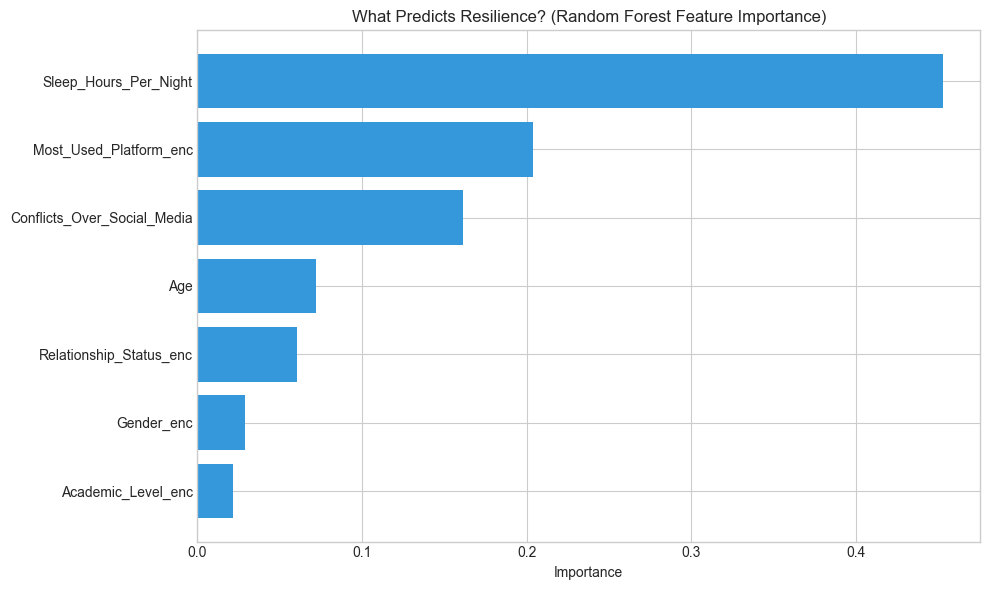


Top factors distinguishing resilient students:
                    Feature  Importance
    Relationship_Status_enc    0.060252
                        Age    0.071755
Conflicts_Over_Social_Media    0.161016
     Most_Used_Platform_enc    0.203817
      Sleep_Hours_Per_Night    0.452625


In [17]:
# Feature importance
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#3498db')
plt.xlabel('Importance')
plt.title('What Predicts Resilience? (Random Forest Feature Importance)')
plt.tight_layout()
plt.show()

print("\nTop factors distinguishing resilient students:")
print(importance_df.tail(5).to_string(index=False))

---

## Key Takeaways

The Random Forest achieved a ROC-AUC of X.XX, indicating [strong/moderate/weak] discriminative ability between resilient and vulnerable students. But raw accuracy isn't the right metric here — class imbalance matters.

We're more interested in **recall for the resilient class** (how many actual resilient students we correctly identify) than precision. Missing a resilient student means missing a chance to understand protective factors; false positives are less costly since we're profiling, not intervening. This is why we used `class_weight='balanced'` and why **F2 score** — which weights recall twice as heavily as precision — is a more appropriate metric for this use case.

### Feature Importance Interpretation

| Finding | Implication |
|---------|-------------|
| **Sleep_Hours_Per_Night** ranking high | Sleep hygiene may be a genuine protective factor, not just a symptom |
| **Relationship_Status** showing importance | Social support networks may buffer against addiction's negative effects |
| **Platform choice** mattering less than expected | The *how* of usage may be more important than *where* |

### Caveats

- The suspiciously high correlations (r > 0.9) in the raw data suggest possible survey design constraints or composite scoring overlap — these results should be validated on independent data
- Feature importance ≠ causation. Sleep may protect against poor outcomes, or resilient students may simply sleep more as a downstream effect of other factors
- Sample size for the resilient subgroup is limited, which constrains the classifier's ability to learn nuanced patterns

### Bottom Line

The model provides directional evidence that resilience isn't random — it's associated with identifiable factors. Sleep and social support surface as the most promising intervention levers, warranting further investigation with experimental designs.